In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot
import itertools
from scipy import stats
import sys
sys.path.insert(0,'../..')
from g4l.data import Sample
from g4l.tree import ContextTree
import g4l.display
import g4l.estimators.ctm as ctm

# load initial data
X = Sample('../example1/folha.txt', [0, 1, 2, 3, 4])
initial_tree = ContextTree(X, max_depth=4)

#### In the past call we found that SMC using BIC procedure could be missing some trees, depending on the _epsilon_ provided

In [8]:
tree_a = ctm.CTM(initial_tree).execute(1.536489)
# Tree A:   c = 1.536489   (11 contexts)     
# tree_a = "000 1 10 100 2 20 200 3 30 300 4"

tree_b = ctm.CTM(initial_tree).execute(1.037299)
# Tree B:   c = 1.037299   (13 contexts)
# tree_b = "000 001 10 100 2 20 200 201 21 3 30 300 4"

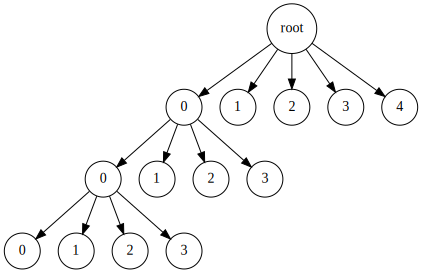

In [9]:
g4l.display.draw_tree(tree_a.to_str())

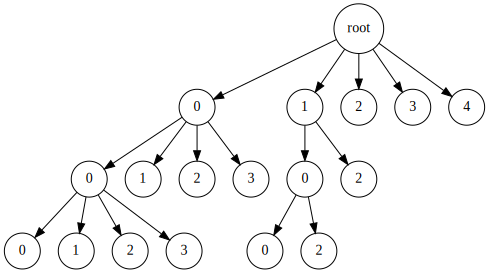

In [10]:
g4l.display.draw_tree(tree_b.to_str())

In [12]:
print('Tree A:', tree_a.to_str())
print('Tree A likelihood:', tree_a.log_likelihood())
print('')
print('Tree B:', tree_b.to_str())
print('Tree B likelihood:', tree_b.log_likelihood())

Tree A: 000 1 10 100 2 20 200 3 30 300 4
Tree A likelihood: -78276.78439141186

Tree B: 000 001 10 100 2 20 200 201 21 3 30 300 4
Tree B likelihood: -77978.66330349314


In [15]:
tree_a.log_likelihood() - tree_b.log_likelihood()

-298.1210879187129

In [29]:
d = tree_b.df.copy()
d.loc[(d.node=='201'), 'final'] = 0
d.loc[(d.node=='001'), 'final'] = 0
d.loc[(d.node=='01'), 'final'] = 1

t = ContextTree(X, max_depth=4, source_data_frame=d[d.final==1])
t.to_str()
#g4l.display.draw_tree(t)


'000 10 100 2 20 200 21 3 30 300 4'

It seems that BIC procedure doesn't produce contexts by expanding one leaf per time. The following snippet shows that there's no tree with 12 contexts between $\tau_{BIC_{1.5349703969}}$ (13 contexts) and $\tau_{BIC_{1.5349703970}}$  (11 contexts) for any intermediary value of step 0.00000000001

In [6]:
last_t = ""
vmin  = 1.5349703969
vmax  = 1.5349703970
vstep = 0.00000000001
rng = np.arange(vmin, vmax, vstep)
dfx = pd.DataFrame(columns=['c', 'contexts', 't'])
pbar = tqdm()
pbar.reset(total=len(rng))
for c in rng:
    t = ctm.CTM(initial_tree).execute(c)    
    pbar.update()
    sz = len(t.to_str().split(' '))
    print(c, '\t', sz, '\t', t.to_str())
    if last_t != t.to_str():
        last_t = t.to_str()        
        dfx.loc[len(dfx)] = [c, sz, t.to_str()]
pbar.refresh()
dfx

1.5349703969 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039691 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039692 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039693 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039694 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039695 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039696 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039697 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039698 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039699 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.534970397 	 11 	 000 1 10 100 2 20 200 3 30 300 4


,c,contexts,t
0,1.53497,13,000 001 10 100 2 20 200 201 21 3 30 300 4
1,1.53497,11,000 1 10 100 2 20 200 3 30 300 4


In [49]:
tree = ContextTree(X, max_depth=4)
tree.df.lps.sum()

-339854.51291223057

In [50]:
tree.df

,l,node_idx,len_idx,parent_idx,node,node_freq,lps,transition_probs,transition_sum_log_probs,flag,final
0,1,0,0,None,0,44111,-62840.152905,"[0.23846659563374215, 0.29559520301058695, 0.3...",-9.367255,0,0
1,1,1,1,None,1,21830,-18794.382713,"[0.6933577645442052, 0.0, 0.20998625744388455,...",-8.296834,0,0
2,1,2,2,None,2,21830,-14715.435172,"[0.5972972972972973, 0.4027027027027027, 0.0, ...",-1.424897,0,0
3,1,3,3,None,3,7909,-6671.568838,"[0.6849159185737768, 0.0, 0.2073587052724744, ...",-9.670055,0,0
4,1,4,4,None,4,2070,-1325.580428,"[0.0, 0.0, 0.6608695652173913, 0.3381642512077...",-1.498422,0,0
...,...,...,...,...,...,...,...,...,...,...,...
775,4,775,620,154,0444,0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0,0
776,4,776,621,154,1444,0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0,0
777,4,777,622,154,2444,0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0,0
778,4,778,623,154,3444,0,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0,0
